**Implementing the simplified Takahashi-Imada method**

In [4]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
from IPython.display import HTML

In [5]:
def U(q):     
    u = np.cos(q) + 0.2 * np.sin(2*q) 
    return u

In [6]:
# initial conditions
q0 = 0
p0 = 2.5
U(q0)

1.0

In [7]:
def force(q):
    # force = -grad U
    f = -(np.sin(q)+0.4*np.cos(2*q))
    return f

In [8]:
def TI_simp(q0,p0,h, force_function):
        
    # Compute the force
    f0 = force_function(q0)
    
    # p(n+1/2)
    alpha = 1/12
    p1 = p0 + h/2*force_function(q0 + alpha * h**2 *f0)
    
    # q(n+1)
    q = q0 + h*p1
    
    # Compute the force again with q(t+h)
    f1 = force_function(q)
    
    #p(n+1)
    p2 = p1 + h/2*force_function(q + alpha * h**2 *f1)
    
    # Compute the new energies
    ke = np.sum( p2*p2) / 2 #??? correct?
    pe = U(q)

    # Total energy is kinetic + potential
    total_e = ke + pe 
    
    # Return values 
    return q, p2, total_e
    
def run_simulation(q0, p0, Nsteps, h, step_function, force_function):
    
    # Initialize the output trajectories
    q_traj = [] 
    p_traj = [] 
    e_traj = [] 
    t_traj = []

    # Set initial conditions
    q = np.copy(q0)
    p = np.copy(p0)
    t = 0

    # Main loop
    for n in range(100):
        
        # Step in time
        q,p,energy = step_function(q, p, h, force_function)
        t = t + h 

        # Save the system's data
        q_traj += [q] 
        p_traj += [p] 
        e_traj += [energy] 
        t_traj += [t] 

    # Format into numpy arrays
    q_traj = np.array(q_traj)
    p_traj = np.array(p_traj) 

    # Return the trajectories
    return q_traj, p_traj, e_traj, t_traj

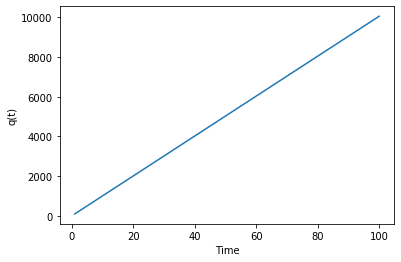

In [9]:
h = 0.05 # Stepsize
#T = 12  # Total time
Nsteps = 100 #Number of steps
q_traj, p_traj, e_traj, t_traj = run_simulation( q0 , Nsteps, h, 1,  TI_simp, force)
plt.plot(t_traj, q_traj)
plt.xlabel('Time')
plt.ylabel('q(t)')
plt.show()

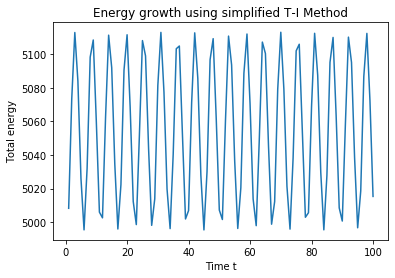

In [10]:
plt.plot( t_traj, e_traj )
plt.xlabel('Time t')
plt.ylabel('Total energy')
plt.title('Energy growth using simplified T-I Method')
plt.show()